# Gym Littering Modeling
In this notebook the experiments from the paper about "Gym Littering Modeling" are run. The main parts of the model are run in the ```gymmodel.py```.

## Importing main codebase

In [1]:
import gymmodel
import mesa

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import random

## Experiment 1: Effect of Environment Effect

In [2]:
np.random.seed(345)
random.seed(345)
N_sim = 50

In [3]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 51)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/15300 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(results)
gym_entropy_results = (
    results_df[results_df["Step"] > 15] # Ignore first 15 steps to achieve some sort of steady state
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var = results_df[results_df["Step"] > 15].groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()

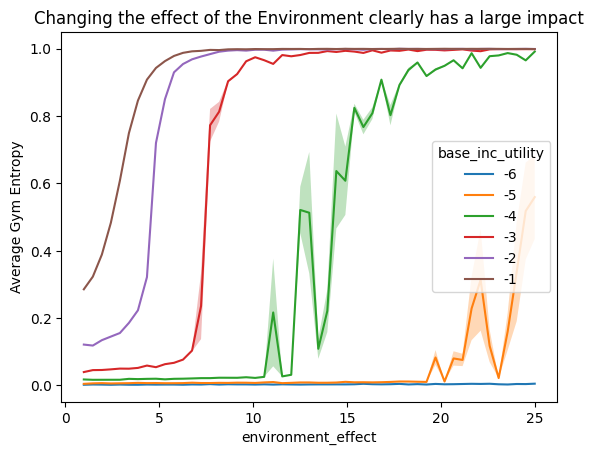

In [ ]:
gym_entropy_results.plot(
    title="Changing the effect of the Environment clearly has a large impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var.index, gym_entropy_results.iloc[:,i] - gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results.iloc[:,i] + gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)
plt.show()

### Low Entropy

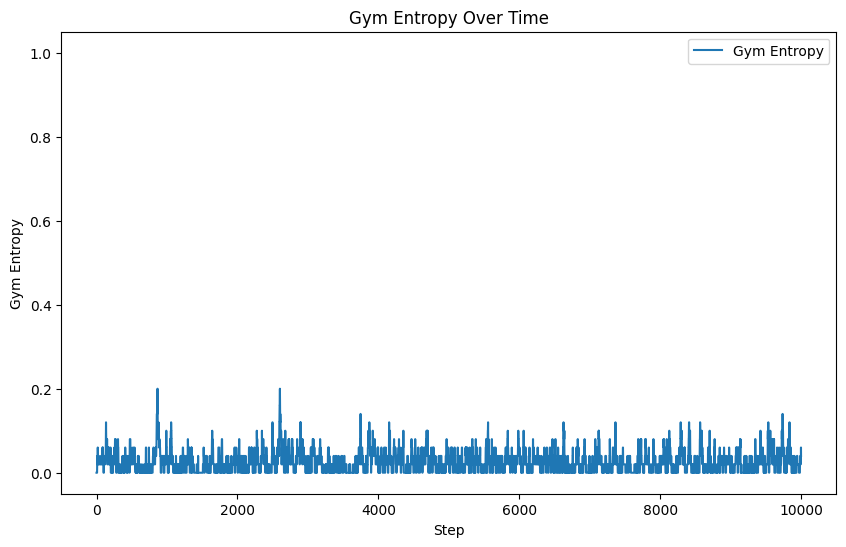

In [ ]:
np.random.seed(345)
random.seed(345)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-4,
    environment_effect=8,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### High Entropy

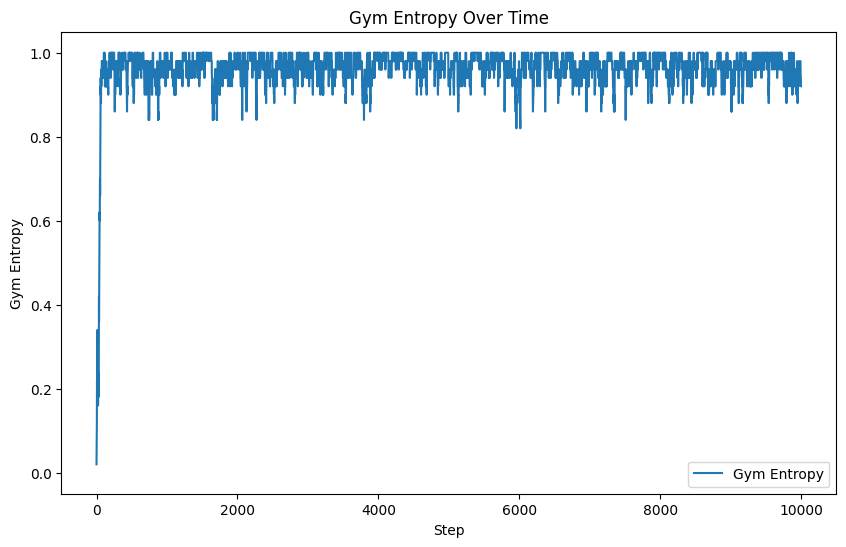

In [ ]:
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### Low-to-high Entropy

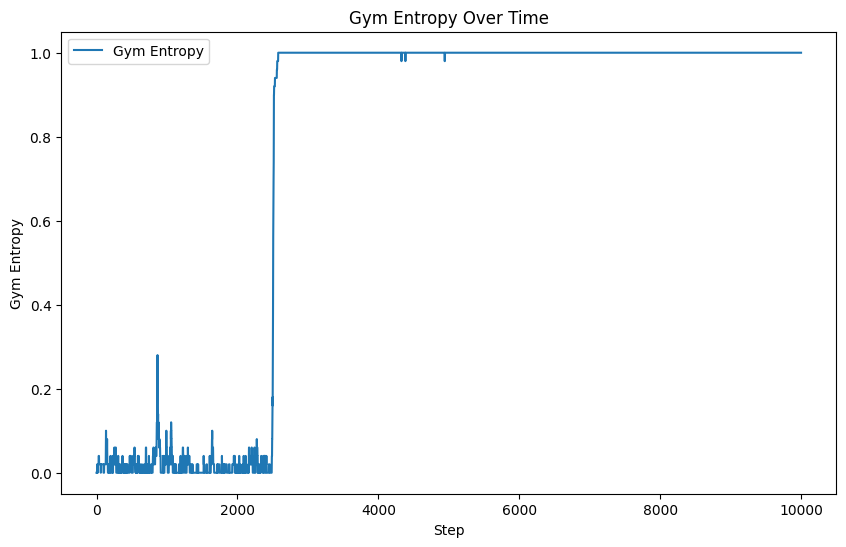

In [ ]:
np.random.seed(345)
random.seed(345)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-4.65,
    environment_effect=15,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)

### High Entropy peaks

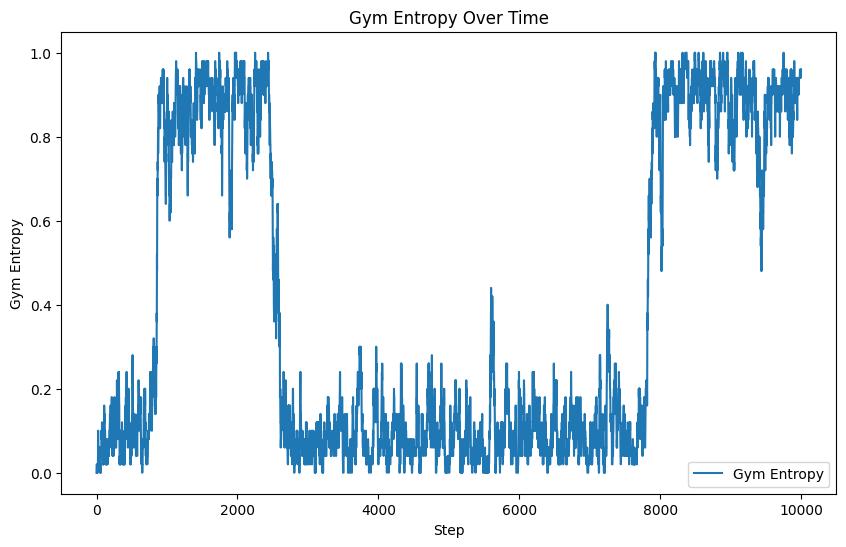

0.396638

In [ ]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

## Heterogeneous Agents

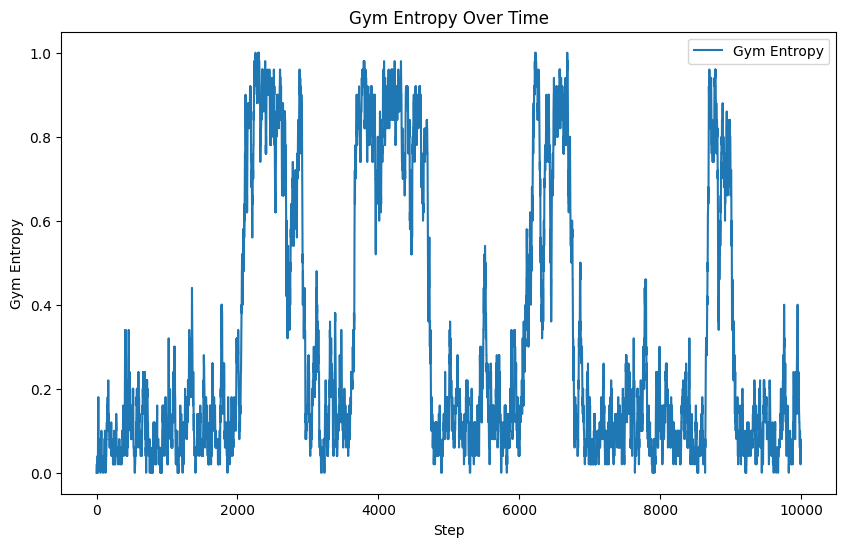

0.31795000000000007

In [ ]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.05,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

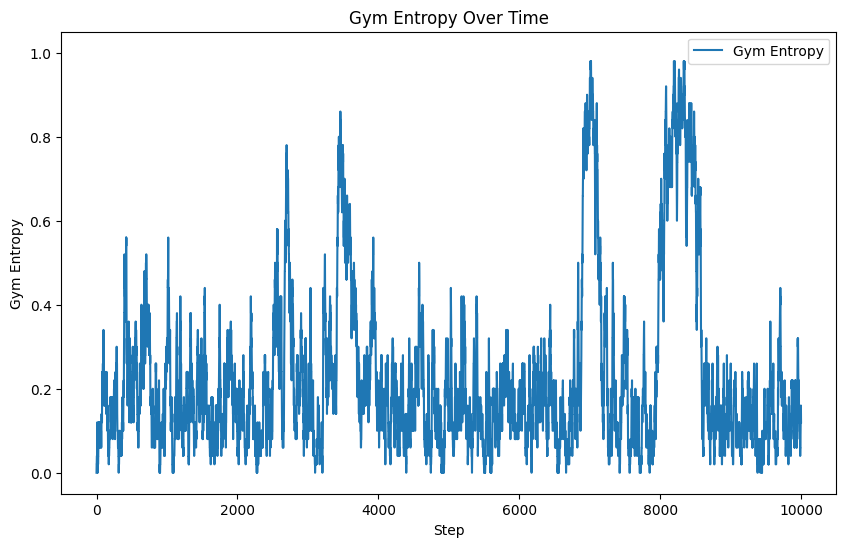

0.22841800000000004

In [ ]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.10,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]


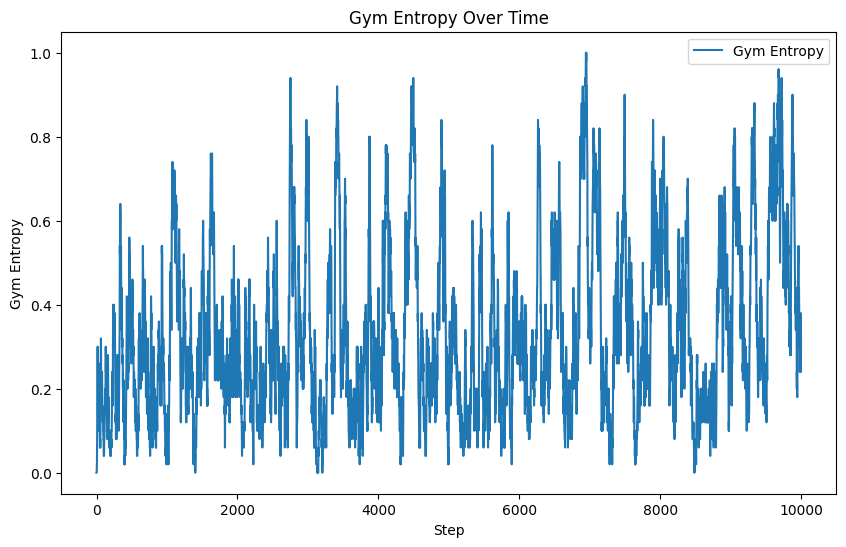

0.33091800000000005

In [ ]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    heterogeneous_frac=0.25,
    good_frac=0.6
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

### First Experiment Rerun

In [ ]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 49)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
        "heterogeneous_frac": 0.25,
        "prev_entropy": [gym_entropy_results]
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/1530 [00:00<?, ?it/s]

In [ ]:
results_df_selected = results_df[results_df["Step"] > 15][["base_inc_utility", "environment_effect", "GymEntropy", "RunId"]]

In [ ]:
gym_entropy_results_h = (
    results_df_selected
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var_h = results_df_selected.groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()
gym_entropy_results_h

base_inc_utility,-6,-5,-4,-3,-2,-1
environment_effect,,,,,,
1.00,0.002246,0.006160,0.014660,0.045665,0.110936,0.292240
1.48,0.001596,0.006262,0.017498,0.040682,0.117511,0.341344
1.96,0.001665,0.005498,0.017023,0.045137,0.134542,0.384020
2.44,0.002920,0.005803,0.017214,0.048512,0.151675,0.474749
2.92,0.002026,0.006948,0.017628,0.048569,0.153291,0.607988
3.40,0.002246,0.006522,0.018185,0.045669,0.173702,0.732004
3.88,0.002514,0.006908,0.017880,0.051553,0.237706,0.848426
4.36,0.002879,0.006818,0.015216,0.051220,0.338485,0.909068
4.84,0.001738,0.006266,0.018806,0.058327,0.652950,0.948150


In [ ]:
gym_entropy_results_h.plot(
    title="Heterogeneous Agents have an impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var_h.index, gym_entropy_results_h.iloc[:,i] - gym_entropy_var_h.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results_h.iloc[:,i] + gym_entropy_var_h.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)
plt.show()

## Early Cleaning Strategy

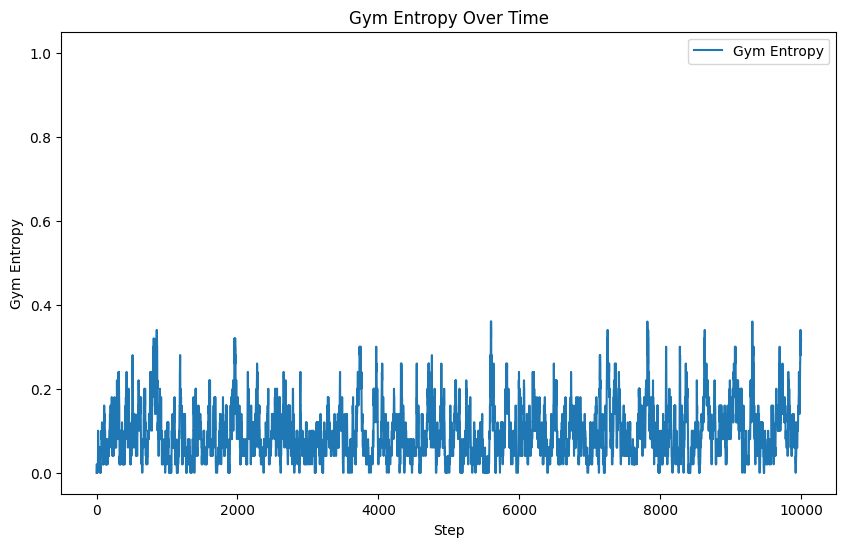

0.093346

In [ ]:
np.random.seed(358)
random.seed(358)
model = gymmodel.GymModel(
    num_employees=1,
    num_attendees=10,
    gym_width=20,
    gym_depth=20,
    base_inc_utility=-2.9,
    environment_effect=6,
    employee_effect=-2,
    attendee_lambda=1,
    weights=50,
    benches=3,
    deadlifts=3,
    free_weights=3,
    early_cleaning=True
)

for i in range(10000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()
gymmodel.plot_gym_entropy(data)
data.mean()["GymEntropy"]

In [ ]:
data

,IncWeightPlacements,EmpCoverage,EmpericalWeightPlacementProbability,GymEntropy,NrAgents,DevicesAvailable,CleanedWeights
0,0,10.000000,1.00,0.00,12,0,0
1,1,9.923077,0.95,0.02,13,0,0
2,1,10.076923,0.95,0.02,13,1,0
3,1,9.785714,0.95,0.02,14,0,0
4,1,9.909091,0.95,0.02,11,2,0
...,...,...,...,...,...,...,...
9995,14,8.000000,0.30,0.28,5,4,38
9996,16,7.200000,0.20,0.32,5,4,38
9997,14,8.600000,0.30,0.28,5,4,38
9998,15,10.000000,0.25,0.30,5,4,38


In [ ]:
results = mesa.batch_run(
    gymmodel.GymModel,
    {
        "num_employees": 2,
        "num_attendees": 10,
        "gym_width": 20,
        "gym_depth": 20,
        "base_inc_utility": [-6, -5, -4, -3, -2, -1],
        "environment_effect": [
            v for v in np.linspace(1, 25, 51)
        ],
        "employee_effect": -2,
        "attendee_lambda": 1,
        "weights": 50,
        "init_incorrect_weights": 0,
        "benches":3,
        "deadlifts": 3,
        "free_weights": 3,
        "early_cleaning": True
    },
    number_processes=None,
    iterations=N_sim,
    data_collection_period=1,
    max_steps=1000
)

  0%|          | 0/1530 [00:00<?, ?it/s]

In [ ]:
results_df = pd.DataFrame(results)
gym_entropy_results = (
    results_df[results_df["Step"] > 15] # Ignore first 15 steps to achieve some sort of steady state
    .groupby(["base_inc_utility", "environment_effect"])
    .mean()["GymEntropy"]
    .unstack()
    .transpose()
)

gym_entropy_var = results_df[results_df["Step"] > 15].groupby(["base_inc_utility", "environment_effect", "RunId"]).mean()["GymEntropy"].groupby(["base_inc_utility", "environment_effect"]).var().unstack().transpose()

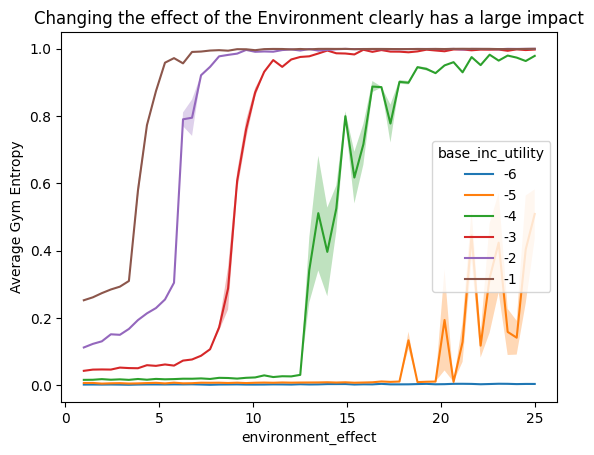

In [ ]:
gym_entropy_results.plot(
    title="Changing the effect of the Environment clearly has a large impact",
    ylabel="Average Gym Entropy",
)

# plt.xscale("log")

for i in range(6):
    plt.fill_between(gym_entropy_var.index, gym_entropy_results.iloc[:,i] - gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), gym_entropy_results.iloc[:,i] + gym_entropy_var.iloc[:, i]*1.96/np.sqrt(N_sim), alpha=0.3)
plt.show()

<Axes: title={'center': 'Returned Gym Weights per variable'}, xlabel='environment_effect', ylabel='Gym Weights returned'>

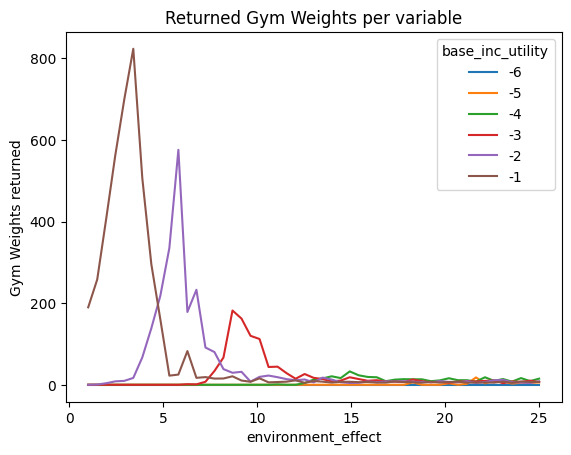

In [ ]:
gym_weights_returned = results_df[results_df["Step"] == 999].groupby(["base_inc_utility", "environment_effect"]).mean()["CleanedWeights"].unstack().transpose()
gym_weights_returned.plot(
    title="Returned Gym Weights per variable",
    ylabel="Gym Weights returned",
)

## Sensitivity Analysis

In [ ]:
from tqdm.notebook import tqdm
from SALib.sample import saltelli
from SALib.analyze import sobol
from itertools import combinations

In [ ]:
problem = {
  'num_vars': 4,
  'names': ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'],
  'bounds': [[-10, -1], [1, 16], [-5, -1], [0.2, 1.2]]
}

samples = saltelli.sample(problem, 1024) # Increase to 1024 for the final run
samples

/var/folders/tn/8dx8j7jn26q_ckdsfpq25f540000gn/T/ipykernel_80477/3447771504.py:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  samples = saltelli.sample(problem, 64) # Increase to 1024 for the final run


array([[-9.7890625,  6.9765625, -1.71875  ,  1.0359375],
       [-4.1640625,  6.9765625, -1.71875  ,  1.0359375],
       [-9.7890625,  7.6796875, -1.71875  ,  1.0359375],
       ...,
       [-5.7109375,  6.0390625, -2.78125  ,  0.2703125],
       [-5.7109375,  6.0390625, -4.03125  ,  0.8328125],
       [-5.7109375,  6.0390625, -4.03125  ,  0.2703125]])

In [ ]:
np.random.seed(358)
random.seed(358)

results = np.zeros((len(samples), 7))

for j, c in enumerate(tqdm(samples)):
    model = gymmodel.GymModel(
        num_employees=1,
        num_attendees=10,
        gym_width=20,
        gym_depth=20,
        base_inc_utility=c[0],
        environment_effect=c[1],
        employee_effect=c[2],
        attendee_lambda=c[3],
        weights=50,
        benches=3,
        deadlifts=3,
        free_weights=3,
        heterogeneous_frac=0.25,
        good_frac=0.6
    )
    
    for i in range(1000):
        model.step()

    results[j] = model.datacollector.get_model_vars_dataframe().iloc[-1]

results

  0%|          | 0/640 [00:00<?, ?it/s]

array([[ 3.        , 17.94117647,  0.85      , ..., 17.        ,
         0.        ,  0.        ],
       [ 2.        , 16.75      ,  0.97777778, ..., 16.        ,
         1.        ,  0.        ],
       [ 3.        , 10.8       ,  0.95      , ...,  5.        ,
         4.        ,  0.        ],
       ...,
       [11.        , 24.        ,  0.81666667, ...,  1.        ,
         8.        ,  0.        ],
       [14.        , 10.33333333,  0.65      , ...,  3.        ,
         6.        ,  0.        ],
       [ 4.        , 11.        ,  0.92      , ...,  2.        ,
         7.        ,  0.        ]])

In [ ]:
analysis = sobol.analyze(problem, results[:,3], print_to_console=True)

                          ST   ST_conf
base_inc_utility    0.747472  0.253162
environment_effect  0.463295  0.228576
employee_effect     0.095906  0.039709
attendee_lambda     0.173131  0.106949
                          S1   S1_conf
base_inc_utility    0.471958  0.276244
environment_effect  0.008149  0.273230
employee_effect    -0.070901  0.116855
attendee_lambda     0.037976  0.154816
                                              S2   S2_conf
(base_inc_utility, environment_effect)  0.372575  0.314511
(base_inc_utility, employee_effect)     0.148353  0.284415
(base_inc_utility, attendee_lambda)    -0.031082  0.304483
(environment_effect, employee_effect)   0.146315  0.351963
(environment_effect, attendee_lambda)   0.163412  0.280565
(employee_effect, attendee_lambda)      0.111510  0.167609


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [ ]:
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')
    plt.show()

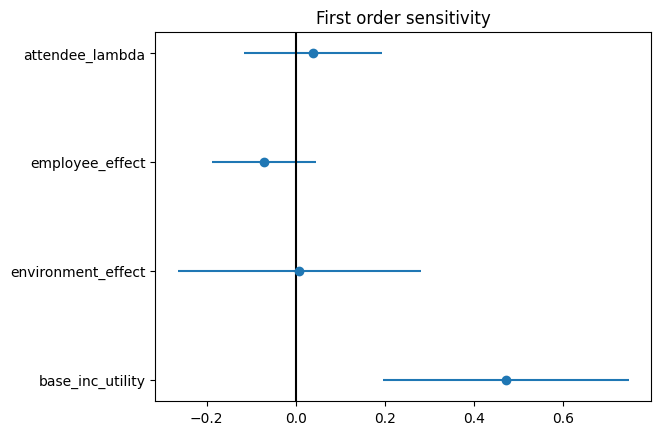

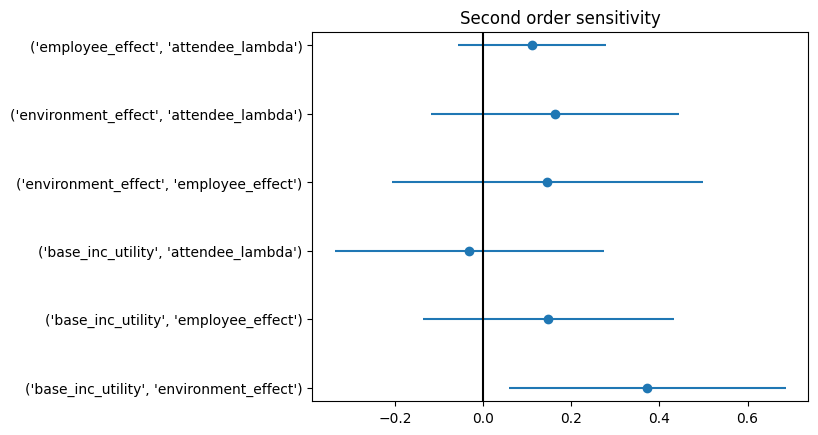

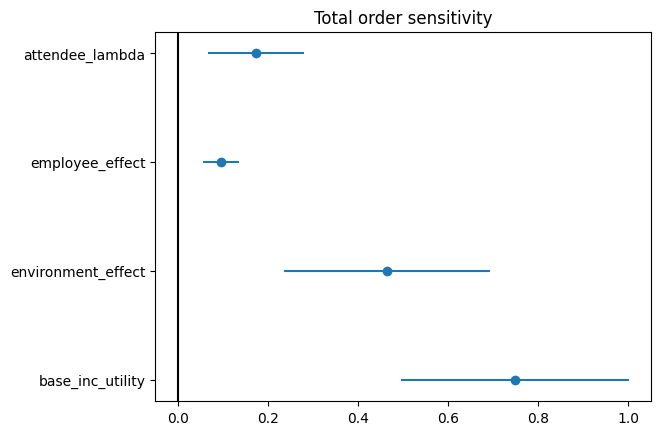

In [ ]:
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "1", "First order sensitivity")
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "2", "Second order sensitivity")
plot_index(analysis, ['base_inc_utility', 'environment_effect', 'employee_effect', 'attendee_lambda'], "T", "Total order sensitivity")
